cost：1
求解的拟合直线为:
y=1.71x^2+8.12x+409.5
11月流量为: 705.664181551706


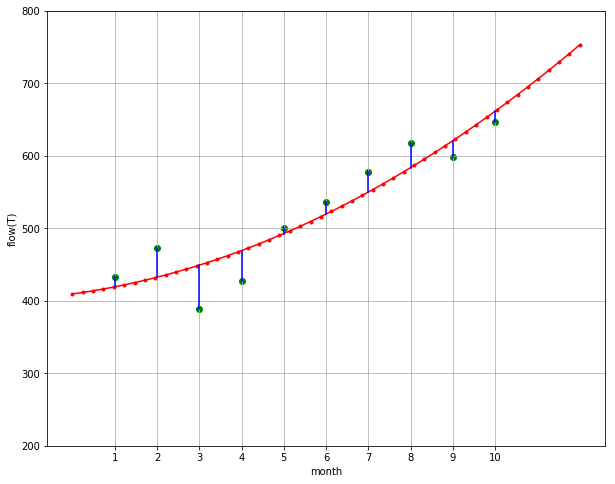

In [7]:
##最小二乘法
import numpy as np   ##科学计算库 
import scipy as sp   ##在numpy基础上实现的部分算法库
import matplotlib.pyplot as plt  ##绘图库
from scipy.optimize import leastsq  ##引入最小二乘法算法

'''
     设置样本数据，真实数据需要在这里处理
'''
##样本数据(Xi,Yi)，需要转换成数组(列表)形式
#对应的月4G忙时流量（TB）
Yi=np.array([432.742149922,472.748708522,389.278264178,426.840054216,499.817123563,536.369395034,578.187152618,618.187792969,599.061184525,646.430869067])

#这里就是不同月
Xi=np.array([1,2,3,4,5,6,7,8,9,10])

'''
    设定拟合函数和偏差函数
    函数的形状确定过程：
    1.先画样本图像
    2.根据样本图像大致形状确定函数形式(直线、抛物线、正弦余弦等)
'''

#k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
p0=[0,0,0]
##需要拟合的函数func :指定函数的形状
def func(p,x):
    a1,a2,b=p
    return a1*x**2+a2*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y

'''
    主要部分：附带部分说明
    1.leastsq函数的返回值tuple，第一个元素是求解结果，第二个是求解的代价值(个人理解)
    2.官网的原话（第二个值）：Value of the cost function at the solution
    3.实例：Para=>(array([ 0.61349535,  1.79409255]), 3)
    4.返回值元组中第一个值的数量跟需要求解的参数的数量一致
'''


#把error函数中除了p0以外的参数打包到args中(使用要求)
Para=leastsq(error,p0,args=(Xi,Yi))

#读取结果
a1,a2,b=Para[0]
print("cost："+str(Para[1]))
print("求解的拟合直线为:")
print("y="+str(round(a1,2))+"x^2+"+str(round(a2,2))+"x+"+str(round(b,2)))
value=11
print('11月流量为:',a1*value**2+a2*value+b)

'''
   绘图，看拟合效果.
   matplotlib默认不支持中文，label设置中文的话需要另行设置
   如果报错，改成英文就可以
'''
plt.figure(figsize=(10,8))
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylim(200,800)
plt.xlabel('month')
plt.ylabel('flow(T)')
plt.grid(True)

#画样本点
plt.scatter(Xi,Yi,color="green") 
#画拟合直线
x=np.linspace(0,12,50) ##在0-15直接画100个连续点






y=a1*x**2+a2*x+b ##函数式
plt.plot(x,y,"r.-") 
for i in Xi:
    point=a1*i**2+a2*i+b 
    plt.plot([i,i],[point,Yi[i-1]],'b')
